In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
import numpy as np
#For correlation analysis
import pingouin
#For ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.pipeline import make_pipeline

In [262]:
#Import data
raw_data = pd.read_csv("candy-data.csv")
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [263]:
#Get overview of the data
raw_data.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


No null values. Properties present in less than 10% of the samples: nougat, crispedricewafer.

In [264]:
raw_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


There might be a correlation between sugar content, price and popularity. This should be investigated before determining which ingredients/properties have the biggest impact on the popularity as they might be leading influences.

Text(0.5, 1.0, 'Price vs. Popularity')

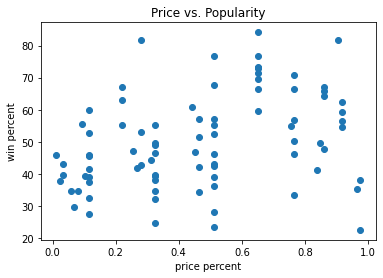

In [265]:
#Compare price and popularity
plt.scatter(raw_data["pricepercent"],raw_data["winpercent"])
plt.xlabel("price percent")
plt.ylabel("win percent")
plt.title("Price vs. Popularity")

In [266]:
#Pearson correlation between price and popularity
scipy.stats.pearsonr(raw_data["pricepercent"],raw_data["winpercent"])

PearsonRResult(statistic=0.34532540996768485, pvalue=0.0012088290261781057)

Moderate correlation between price and popularity, high confidence.  
The plot shows high popularity for candies around the 60-70% price range which I will investigate with a LOcally Weighted Scatterplot Smoothing (LOWESS).

In [267]:
#Calculate lowess for price and popularity
lowess = sm.nonparametric.lowess(raw_data["winpercent"],raw_data["pricepercent"],frac=0.3)
lowess

array([[1.10000000e-02, 3.71186281e+01],
       [2.30000000e-02, 3.76882590e+01],
       [3.40000020e-02, 3.82534557e+01],
       [3.40000020e-02, 3.82534557e+01],
       [5.79999980e-02, 3.96323458e+01],
       [6.89999980e-02, 4.03309113e+01],
       [8.10000000e-02, 4.11461228e+01],
       [9.30000020e-02, 4.20320026e+01],
       [1.04000000e-01, 4.29307860e+01],
       [1.16000000e-01, 4.40475772e+01],
       [1.16000000e-01, 4.40475772e+01],
       [1.16000000e-01, 4.40475772e+01],
       [1.16000000e-01, 4.40475772e+01],
       [1.16000000e-01, 4.40475772e+01],
       [1.16000000e-01, 4.40475772e+01],
       [1.16000000e-01, 4.40475772e+01],
       [1.16000000e-01, 4.40475772e+01],
       [1.16000000e-01, 4.40475772e+01],
       [2.20000000e-01, 6.08239699e+01],
       [2.20000000e-01, 6.08239699e+01],
       [2.20000000e-01, 6.08239699e+01],
       [2.55000000e-01, 5.30844376e+01],
       [2.66999990e-01, 5.09480826e+01],
       [2.79000010e-01, 4.88238631e+01],
       [2.790000

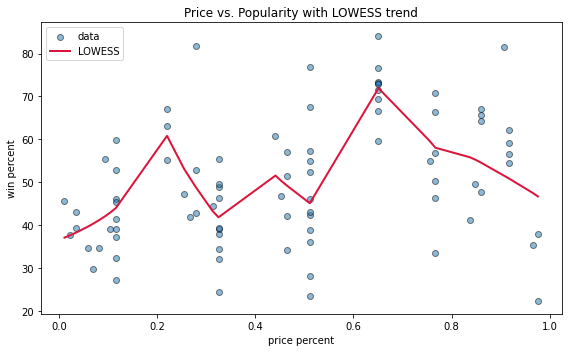

In [268]:
#Order values for correct plotting
order = np.argsort(lowess[:,0])
x_smooth = lowess[order,0]
y_smooth = lowess[order,1]

#Create subplots to combine scatter and lowess
fig, ax = plt.subplots(figsize=(8, 5),facecolor="white")
ax.scatter(raw_data["pricepercent"],raw_data["winpercent"],alpha = 0.5, edgecolor = "k", label = "data")
ax.plot(x_smooth,y_smooth,color="crimson",linewidth=2,label="LOWESS")

#Additional information and styling
ax.set_xlabel("price percent")
ax.set_ylabel("win percent")
ax.set_title("Price vs. Popularity with LOWESS trend")
ax.legend()
fig.tight_layout()

Candy around 65% price point seems to be especially popular. This can be used as an indicator for pricing of the new candy type, however the (unknown) candy brand could be an additional factor influencing price and popularity.

Text(0.5, 1.0, 'Sugar vs. Popularity')

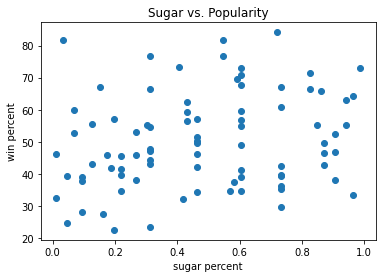

In [269]:
#Compare sugar content and popularity
plt.scatter(raw_data["sugarpercent"],raw_data["winpercent"])
plt.xlabel("sugar percent")
plt.ylabel("win percent")
plt.title("Sugar vs. Popularity")

In [270]:
#Pearson correlation for sugar and popularity
scipy.stats.pearsonr(raw_data["sugarpercent"],raw_data["winpercent"])

PearsonRResult(statistic=0.2291506571280065, pvalue=0.034897896761698334)

Low to moderate correlation between sugar and popularity, moderate to high confidence.

In [271]:
lowess_sugar = sm.nonparametric.lowess(raw_data["winpercent"],raw_data["sugarpercent"],frac=0.3)
lowess_sugar

array([[1.10000000e-02, 4.18752328e+01],
       [1.10000000e-02, 4.18752328e+01],
       [3.40000020e-02, 4.22302778e+01],
       [4.60000000e-02, 4.23980677e+01],
       [4.60000000e-02, 4.23980677e+01],
       [6.89999980e-02, 4.26814589e+01],
       [6.89999980e-02, 4.26814589e+01],
       [9.30000020e-02, 4.29435582e+01],
       [9.30000020e-02, 4.29435582e+01],
       [9.30000020e-02, 4.29435582e+01],
       [1.27000000e-01, 4.31442231e+01],
       [1.27000000e-01, 4.31442231e+01],
       [1.50999990e-01, 4.28872923e+01],
       [1.62000000e-01, 4.28689926e+01],
       [1.73999990e-01, 4.28423129e+01],
       [1.86000000e-01, 4.28589839e+01],
       [1.97000000e-01, 4.29065133e+01],
       [1.97000000e-01, 4.29065133e+01],
       [2.20000000e-01, 4.36970188e+01],
       [2.20000000e-01, 4.36970188e+01],
       [2.20000000e-01, 4.36970188e+01],
       [2.20000000e-01, 4.36970188e+01],
       [2.66999990e-01, 4.64137860e+01],
       [2.66999990e-01, 4.64137860e+01],
       [2.669999

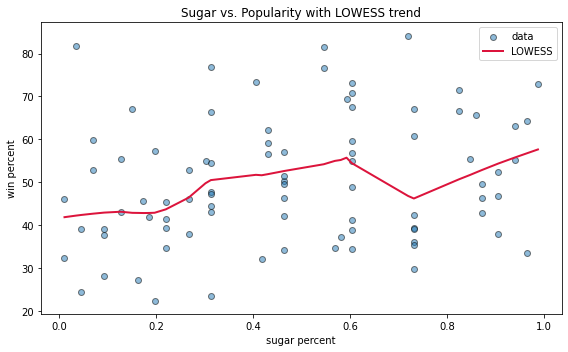

In [272]:
#Order values for correct plotting
order = np.argsort(lowess_sugar[:,0])
x_smooth = lowess_sugar[order,0]
y_smooth = lowess_sugar[order,1]

#Create subplots to combine scatter and lowess
fig, ax = plt.subplots(figsize=(8, 5),facecolor="white")
ax.scatter(raw_data["sugarpercent"],raw_data["winpercent"],alpha = 0.5, edgecolor = "k", label = "data")
ax.plot(x_smooth,y_smooth,color="crimson",linewidth=2,label="LOWESS")

#Additional information and styling
ax.set_xlabel("sugar percent")
ax.set_ylabel("win percent")
ax.set_title("Sugar vs. Popularity with LOWESS trend")
ax.legend()
fig.tight_layout()

Higher sugar content apparently does not hurt; no apparent sweet spot for sugar content.

Check now for correlation between sugar and price:

Text(0.5, 1.0, 'Sugar vs. Popularity')

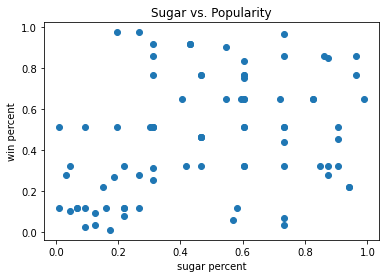

In [273]:
#Compare suagr content and price
plt.scatter(raw_data["sugarpercent"],raw_data["pricepercent"])
plt.xlabel("sugar percent")
plt.ylabel("win percent")
plt.title("Sugar vs. Popularity")

In [274]:
scipy.stats.pearsonr(raw_data["sugarpercent"],raw_data["pricepercent"])

PearsonRResult(statistic=0.32970638758895476, pvalue=0.0020604027524857094)

Moderate correlation between sugar and price, high significance.

In [275]:
#Prepare metric data for further correlation analysis
metric_vars = raw_data[["pricepercent","sugarpercent","winpercent"]].copy()
metric_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pricepercent  85 non-null     float64
 1   sugarpercent  85 non-null     float64
 2   winpercent    85 non-null     float64
dtypes: float64(3)
memory usage: 2.1 KB


In [276]:
#Pearson correlation of price and popularity after removing effect of covariate sugar
pcorr_price = pingouin.partial_corr(data = metric_vars, x = "pricepercent", y = "winpercent", covar = "sugarpercent", method = "pearson")
pcorr_price

,n,r,CI95%,p-val
pearson,85,0.293563,"[0.08, 0.48]",0.006724


In [277]:
#Pearson correlation of sugar and popularity after removing effect of covariate price
pcorr_sugar = pingouin.partial_corr(data = metric_vars, x = "sugarpercent", y = "winpercent", covar = "pricepercent", method = "pearson")
pcorr_sugar

,n,r,CI95%,p-val
pearson,85,0.130128,"[-0.09, 0.34]",0.238079


Price apparently influences buying choice more than the sugar content (pcorr_sugar significantly lower than non-partial correlation). Initial sugar correlation seems to be confounded by the price.

In [278]:
#Prepare binary candy properties for correlation analysis
candy_properties = ["chocolate","fruity","caramel","peanutyalmondy","nougat","crispedricewafer","hard","bar","pluribus"]

#Collect p-values for False Discovery Rate (FDR) correction later
p_vals = []

#Calculate pearson/point-biserial correlation for all binary candy properties after removing price effects
for property in candy_properties:
    pcorr = pingouin.partial_corr(data = raw_data, x = property, y = "winpercent", covar = "pricepercent", method = "pearson") #pearson is the same as r_pb in this case

    r_val = pcorr["r"].iloc[0]
    p_val = pcorr["p-val"].iloc[0]
    p_vals.append(p_val)

    print(f"{property:17s}  r = {r_val: .3f}   p = {p_val: .4f}")


chocolate          r =  0.571   p =  0.0000
fruity             r = -0.274   p =  0.0116
caramel            r =  0.138   p =  0.2094
peanutyalmondy     r =  0.335   p =  0.0018
nougat             r =  0.158   p =  0.1513
crispedricewafer   r =  0.238   p =  0.0290
hard               r = -0.248   p =  0.0227
bar                r =  0.313   p =  0.0038
pluribus           r = -0.187   p =  0.0884


In [279]:
#Benjamini-Hochberg (BH) correction for False Discovery Rate (FDR)
pingouin.multicomp(p_vals, method = "fdr_bh")

(array([ True,  True, False,  True, False,  True,  True,  True, False]),
 array([1.31780044e-07, 2.61851384e-02, 2.09386024e-01, 8.14509466e-03,
        1.70242574e-01, 4.34803021e-02, 4.09329353e-02, 1.13563738e-02,
        1.13719776e-01]))

In [280]:
#Benjamini-Yekutieli (BY) correction for False Discovery Rate (FDR)
pingouin.multicomp(p_vals, method = "fdr_by")

(array([ True, False, False,  True, False, False, False,  True, False]),
 array([3.72801560e-07, 7.40769252e-02, 5.92346415e-01, 2.30422142e-02,
        4.81610838e-01, 1.23004394e-01, 1.15797974e-01, 3.21268209e-02,
        3.21709637e-01]))

Properties with a positive correlation to popularity (high confidence): chocolate, peanuty-almondy, bar  
Properties with a positive correlation to popularity (moderate confidence): crisped rice wafer   
Properties with a negative correlation to popularity (moderate confidence): fruity, hard   
Unclear/not enough data (not siginificat after using Benjamini Hochberg FDR correction): nougat, caramel, pluribus



In [281]:
#Check which candies already have exactly the relevant properties
required_properties = ['chocolate','peanutyalmondy','bar']
other_properties = list(set(candy_properties)-set(required_properties))

mask = (
    (raw_data['chocolate'] == 1) &
    (raw_data['peanutyalmondy'] == 1) &
    (raw_data['bar'] == 1) 
)

for property in required_properties:
    mask &= (raw_data[property] == 1)

for property in other_properties:
    mask &= (raw_data[property] == 0)

raw_data.loc[mask]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
40,Mr Good Bar,1,0,0,1,0,0,0,1,0,0.313,0.918,54.526451
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641


In [282]:
#Average Popularity for candies with these properties
raw_data.loc[mask,'winpercent'].mean()

58.53654600000001

In [283]:
#Show top 5 performing candies
raw_data.sort_values('winpercent',ascending=False).head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782


Candy containing only chocolate, peanutyamondy and bar properties show slightly higher popularity than the average candy on the dataset. None of them are in the Top 5; the first one appears on position 10 in the ranking.   
Potential reasons for comparatively bad performance:   

1) Higher pricing. Check while designing new candy if 65% pricepercent is possible for the required properties. High performing candies are all wellknown brand candies. This is not represented in the dataset; a strong branding like this might not be achievable for a store brand. 
2) Caramel and nougat were in less than 10% of samples and could play a bigger role than the data suggests. They show up in 2 of the Top5 candies. 
3) Dataset does not account for texture of the product (except for 'hard' property). Could be testedd with a hedonic test during production.

In [284]:
#Check dataset for candies that additionally contain crispiedricewafer
raw_data.loc[(raw_data['chocolate']==1) & (raw_data['peanutyalmondy']==1) & (raw_data['bar']==1) & (raw_data['crispedricewafer']==1)]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
65,Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251


Only one product has all four properties with positive correlation: chocolate, peanutyamondy, crispedricewafer and bar. Snickers Crisper additionally contains caramel. A product with only the 4 positively correlated properties is not part of the current product lineup and might be a gap in the market to explore. 

To have a sanity check for the current results and to account for correlations between properties,  an Elastic Net analysis is performed:

In [285]:
#Prepare dataset for analysis
data = raw_data.copy()
data['winpercent']=data['winpercent']/100 #adjust range for Elastic Net
data.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,0.503168
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,0.147144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,0.224453
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,0.391411
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,0.478298
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,0.598640
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,0.841803


In [286]:
#Separate target value and predictors
y = data['winpercent'].values

num_cols = ['pricepercent','sugarpercent']
feature_columns = num_cols + candy_properties

X = data[feature_columns].copy()

#Scale predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split test and training data
X_tr, X_te, y_tr, y_te = train_test_split(X_scaled, y, test_size=0.2, random_state=13)

#Elastic Net Model with Cross Validation for hyperparameters
enet = ElasticNetCV(l1_ratio=[0.1,0.25,0.5,0.75,0.9],alphas=None,cv=10,random_state=13,max_iter=10000)
enet.fit(X_tr,y_tr)

ElasticNetCV(cv=10, l1_ratio=[0.1, 0.25, 0.5, 0.75, 0.9], max_iter=10000,
             random_state=13)

In [287]:
print("Best α (l1_ratio):", enet.l1_ratio_)
print("Best λ (alpha)   :", enet.alpha_)
coefs = pd.Series(enet.coef_, index=feature_columns).sort_values(key=abs, ascending=False)
print(coefs)
print("Test-R²:", enet.score(X_te, y_te))

Best α (l1_ratio): 0.9
Best λ (alpha)   : 0.00759475216771691
chocolate           0.077869
peanutyalmondy      0.023545
crispedricewafer    0.021440
hard               -0.016751
fruity              0.014484
sugarpercent        0.008045
pricepercent       -0.000000
caramel             0.000000
nougat             -0.000000
bar                 0.000000
pluribus           -0.000000
dtype: float64
Test-R²: 0.40340508875855463


Elastic Net has a strong lean towards lasso (alpha = 0.9). The total penalty term, however, is small (lambda = 0.008). This means that the model tries to bring a lot of predictors that do not have a big impact on the popularity to zero, while letting the remaining properties have their full effect. This speaks for a strong impact of remaining properties. Properties that receive a coefficient of zero in this setup are not necessarily irrelevant in this setup, but have less impact than the remaining properties.  
Chocolate, peanutyalmondy and crispedricewafer remain highly relevant. Bar is suppressed by lasso (presumably through high correlation with chocolate; to be investigated). Fruity surprisingly turns from a negative correlation to a low positive impact on popularity. This might be due to the fact that fruity flavors often appear in hard candies (to be investigated) which still have a negative impact on popularity in this analysis. Sugar seems to have a slight positive impact on popularity while price is suppressed by lasso.  
40% of popularity variability can be explained through the model and it's properties. However, there are still many other factors that can influence the popularity of a candy beyond the represented predictors.

How many percent points does the popularity of a type of candy increase compared to the average candy?

In [288]:
#Calculate pp effect compared to average candy: jump of (1-mu)/sd
X_raw       = raw_data[feature_columns]
y_raw       = raw_data["winpercent"]

sd_y = y_raw.std(ddof=0)

delta_z = {}

for col in coefs.index:
    x = X_raw[col]
    
    if set(x.unique()) <= {0, 1}: #binary properties
        mu  = x.mean()
        std = x.std(ddof=0)
        delta_z[col] = (1 - mu) / std
    else: #metric properties
        delta_z[col] = 1.0

#Translate coefficient effect to pp scale
effect_pp = coefs * pd.Series(delta_z) * sd_y
effect_pp = effect_pp.sort_values(key=np.abs, ascending=False)

print("Popularity increase in pp:")
print(effect_pp)

Popularity increase in pp:
chocolate           1.297346
crispedricewafer    1.046863
peanutyalmondy      0.775589
hard               -0.529318
fruity              0.235617
sugarpercent        0.117682
pricepercent       -0.000000
caramel             0.000000
nougat             -0.000000
bar                 0.000000
pluribus           -0.000000
dtype: float64


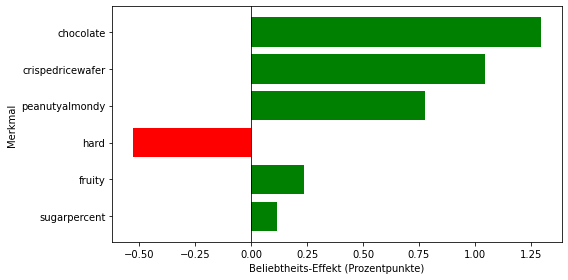

In [289]:
#Plot non-null results for managament summary slide (German labels)
relevant_effects = effect_pp[effect_pp != 0].sort_values(key=np.abs)

colors = ['green' if v > 0 else 'red' for v in relevant_effects]

plt.figure(figsize=(8, 4))
plt.barh(relevant_effects.index, relevant_effects.values, color=colors)
plt.axvline(0, linewidth=0.8, color='black')   # Null‑Linie
plt.xlabel('Beliebtheits‑Effekt (Prozentpunkte)')
plt.ylabel('Merkmal')
plt.tight_layout()
plt.show()

Crispiedricewafer becomes significantly more relevant because it is underrrepresented in the dataset. A small trial of two recipes (one with and one without crispiedricewafer) could give more insight if the addition is actually beneficial.

In [290]:
#Train model again with fixed hyperparameters
enet_fixed = ElasticNet(
        alpha   = enet.alpha_,
        l1_ratio= enet.l1_ratio_,
        max_iter=10000,
        random_state=13
).fit(X_tr, y_tr)

#Crossvalidation on entire dataset with fixed hyperparameters
rkf = RepeatedKFold(n_splits=5, n_repeats=20, random_state=13)
cv_r2 = cross_val_score(enet_fixed, X_scaled, y, cv=rkf, scoring="r2", n_jobs=-1)
print(f"CV-R² (mean ± sd): {cv_r2.mean():.3f} ± {cv_r2.std():.3f}")

CV-R² (mean ± sd): 0.326 ± 0.205


High std can be explained by small dataset. If test set contains many candies with features where coefficients are 0, the resulting r2 will be bad. This has no significant relevance in this analysis since the goal is to find the properties with the most impact.

Some additional checks for potentially correlated properties in the dataset:
1) Chocolate/Bar
2) Fruity/Hard
3) Fruity/Chocolate

In [291]:
len(raw_data.loc[(raw_data['chocolate']==1) & (raw_data['bar']==1)])

20

In [292]:
len(raw_data.loc[(raw_data['chocolate']==0) & (raw_data['bar']==1)])

1

In [293]:
len(raw_data.loc[(raw_data['chocolate']==1) & (raw_data['bar']==0)])

17

In [294]:
raw_data.loc[(raw_data['chocolate']==1) & (raw_data['bar']==1)]['winpercent'].mean()

62.045353399999996

In [295]:
raw_data.loc[(raw_data['chocolate']==1) & (raw_data['bar']==0)]['winpercent'].mean()

59.59938352941176

Only one bar does not contain chocolate. This might explain why the bar property was dismissed by Elastic Net since chocolate is a strong predictor. Chocolate bars show a slightly higher popularity (not significant) than non-bar chocolate items. Bar property can be added based on already existing assortment.

In [296]:
len(raw_data.loc[(raw_data['fruity']==1) & (raw_data['hard']==1)])

13

In [297]:
len(raw_data.loc[(raw_data['fruity']==0) & (raw_data['hard']==1)])

2

In [298]:
len(raw_data.loc[(raw_data['fruity']==1) & (raw_data['hard']==0)])

25

In [299]:
len(raw_data.loc[(raw_data['fruity']==1) & (raw_data['chocolate']==1)])

1

In [300]:
raw_data.loc[(raw_data['fruity']==1) & (raw_data['hard']==1)]['winpercent'].mean()

41.23282523076924

In [301]:
raw_data.loc[(raw_data['fruity']==1) & (raw_data['hard']==0)]['winpercent'].mean()

45.620937839999996

Properties fruity and hard appear together often (fruity flavors perform slightly better withot hard property), chocolate and fruity combinations do not appear often. Combining a fruity flavor with chocolate could be a niche in the market, but would be very experimental.

Assuming assorment = provided dataset:

In [302]:
raw_data.loc[(raw_data['chocolate']==1) & (raw_data['crispedricewafer']==1) & (raw_data['bar']==1) & (raw_data['peanutyalmondy']==1)]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
65,Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251


In [303]:
raw_data.loc[(raw_data['chocolate']==1) & (raw_data['crispedricewafer']==1) & (raw_data['bar']==0) & (raw_data['peanutyalmondy']==1)]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent


In [304]:
raw_data.loc[(raw_data['chocolate']==1) & (raw_data['crispedricewafer']==0) & (raw_data['bar']==1) & (raw_data['peanutyalmondy']==1)]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
40,Mr Good Bar,1,0,0,1,0,0,0,1,0,0.313,0.918,54.526451
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782


In [305]:
raw_data.loc[(raw_data['chocolate']==1) & (raw_data['crispedricewafer']==0) & (raw_data['bar']==0) & (raw_data['peanutyalmondy']==1)]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
32,Peanut butter M&M's,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
47,Peanut M&Ms,1,0,0,1,0,0,0,0,1,0.593,0.651,69.483788
51,Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
52,Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
53,Reese's pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
54,Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901


Assuming the assortment is equal to the provided dataset, my recommendation would be to go with one of the following two combinations:
1) Chocolate, peanutyalmondy, crispedricewafer
2) Chocolate, peanutyalmondy, crispedricewafer, bar

The addition of the crispedricewafer should to be assessed in a small triangle test, but the property is not contained in a lot of the current products and therefore provides a gap in the market.  
The consistency should not be hard, the addition of fruity flavors can be tested additionally or considered for future sub-types of the new store brand candy.

To further assess the influence of combined effects (chocolate/bar, fruity/hard) and non-linear effects a Gradient Boosted Tree with SHAP (SHapley Additive exPlanations) could be performed.  
Confidence intervals for small representations of properties can be added through Bootstrapping.